# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
params = {
    "appid": weather_api_key,
    "units": "imperial",
    
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    # Create endpoint URL with each city
    city_url = url
    params["q"] = city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url=city_url, params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | bilajer
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | yuzhno-kurilsk
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | camocim
Processing Record 11 of Set 1 | patrocinio
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | pemangkat
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | la'ie
Processing Record 16 of Set 1 | baikonur
Processing Record 17 of Set 1 | sao miguel do araguaia
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | viqueque
Processing Record 21 of Set 1 | guarapari
Processing Record 22 of Set 1 | 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df["City"] = city_data_df["City"].str.title()

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Waitangi,-43.9535,-176.5597,54.82,84,58,5.01,NZ,1699799211
1,Bilajer,40.5681,50.0378,62.42,82,0,20.71,AZ,1699799212
2,Port-Aux-Francais,-49.3500,70.2167,41.14,92,100,37.94,TF,1699799212
3,Puerto Natales,-51.7236,-72.4875,52.25,46,75,14.97,CL,1699799212
4,Ketchikan,55.3422,-131.6461,42.78,93,75,0.00,US,1699799212


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Waitangi,-43.9535,-176.5597,54.82,84,58,5.01,NZ,1699799211
1,Bilajer,40.5681,50.0378,62.42,82,0,20.71,AZ,1699799212
2,Port-Aux-Francais,-49.3500,70.2167,41.14,92,100,37.94,TF,1699799212
3,Puerto Natales,-51.7236,-72.4875,52.25,46,75,14.97,CL,1699799212
4,Ketchikan,55.3422,-131.6461,42.78,93,75,0.00,US,1699799212


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

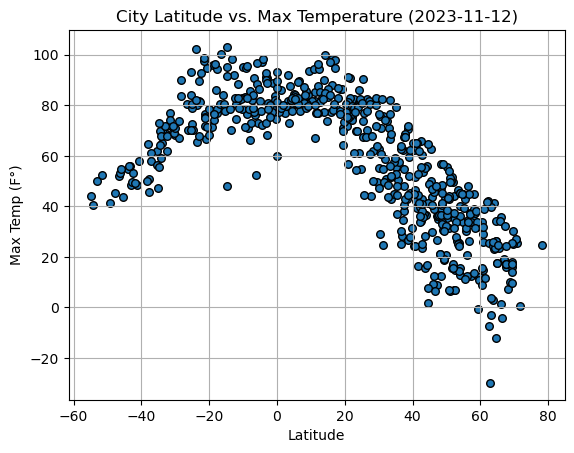

In [40]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot(
    kind="scatter", 
    x="Lat", 
    y="Max Temp", 
    ylabel="Max Temp (F°)",
    xlabel= "Latitude",
    title="City Latitude vs. Max Temperature (2023-11-12)", 
    grid=True,
    edgecolor= "black",
    s= 30)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

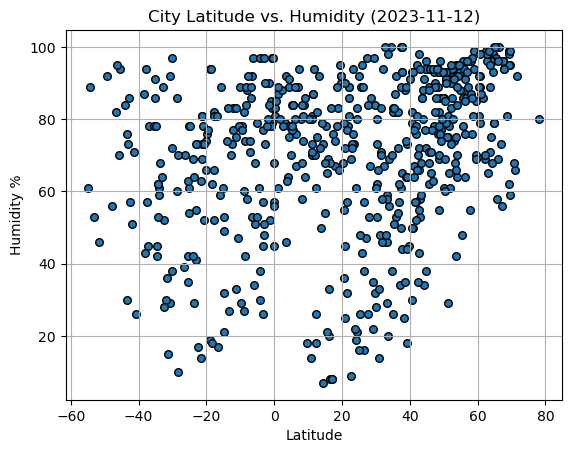

In [41]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(
    kind="scatter", 
    x="Lat", 
    y="Humidity", 
    ylabel="Humidity %",
    xlabel="Latitude",
    title="City Latitude vs. Humidity (2023-11-12)", 
    grid=True,
    edgecolor= "black",
    s= 30)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

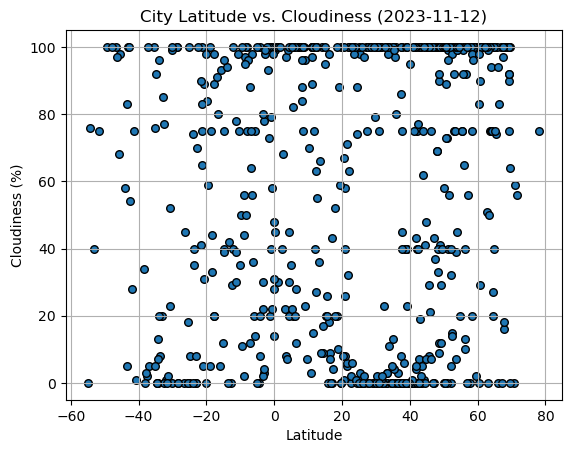

In [43]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot(
    kind="scatter", 
    x="Lat", 
    y="Cloudiness", 
    ylabel="Cloudiness (%)",
    xlabel="Latitude",
    title="City Latitude vs. Cloudiness (2023-11-12)", 
    grid=True,
    edgecolor= "black",
    s= 30)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

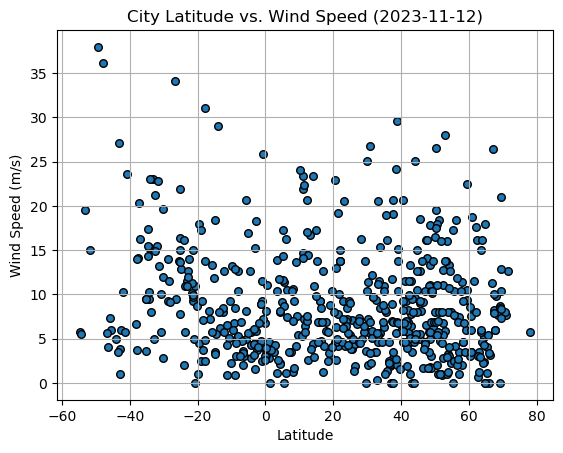

In [45]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot(
    kind="scatter", 
    x="Lat", 
    y="Wind Speed", 
    ylabel="Wind Speed (m/s)",
    xlabel="Latitude",
    title="City Latitude vs. Wind Speed (2023-11-12)", 
    grid=True,
    edgecolor= "black",
    s= 30)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def lin_regress_plot(dataframe, xcol=str, ycol=str, line_eqcoord=tuple):
    """
    Creates Linear Regression Plot
    
    **Parameters**
    
    :dataframe --> Takes pandas dataframe
    :xcol --> Takes column name from dataframe for desired x values
    :ycol --> Takes column name from dataframe for desired y values
    :line_eqcoord --> Takes tuple for x, y coordinates of line equation
    """
    x_values = dataframe[xcol]
    y_values = dataframe[ycol]

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_eqcoord,fontsize=15,color="red")

    # Label plot
    plt.xlabel("Latitude")
    plt.ylabel(ycol)

    # Print r square value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Bilajer,40.5681,50.0378,62.42,82,0,20.71,AZ,1699799212
4,Ketchikan,55.3422,-131.6461,42.78,93,75,0.00,US,1699799212
5,Yuzhno-Kurilsk,44.0306,145.8556,36.37,80,62,9.55,RU,1699799212
7,Petropavlovsk-Kamchatsky,53.0452,158.6483,26.46,74,75,28.01,RU,1699799213
12,Pemangkat,1.1667,108.9667,77.95,87,100,4.61,ID,1699799214


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Waitangi,-43.9535,-176.5597,54.82,84,58,5.01,NZ,1699799211
2,Port-Aux-Francais,-49.3500,70.2167,41.14,92,100,37.94,TF,1699799212
3,Puerto Natales,-51.7236,-72.4875,52.25,46,75,14.97,CL,1699799212
6,West Island,-12.1568,96.8225,80.58,83,40,12.66,CC,1699799213
8,Avarua,-21.2078,-159.7750,71.65,73,100,9.22,CK,1699799213


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7287926827989594


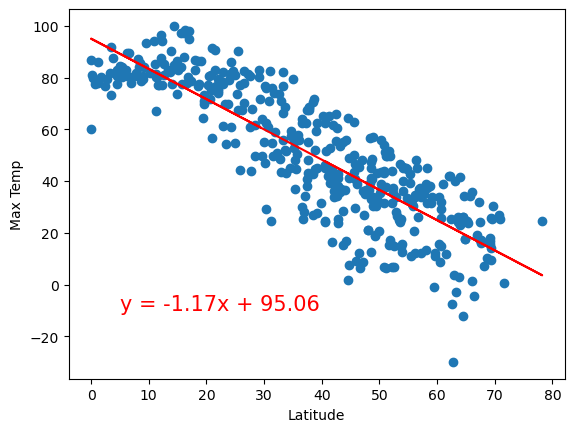

In [63]:
#Linear Regression on Northern Hemisphere
max_temp_lin_regress_north = lin_regress_plot(northern_hemi_df, "Lat", "Max Temp", (5, -10))
max_temp_lin_regress_north

The r-value is: 0.49156226724263263


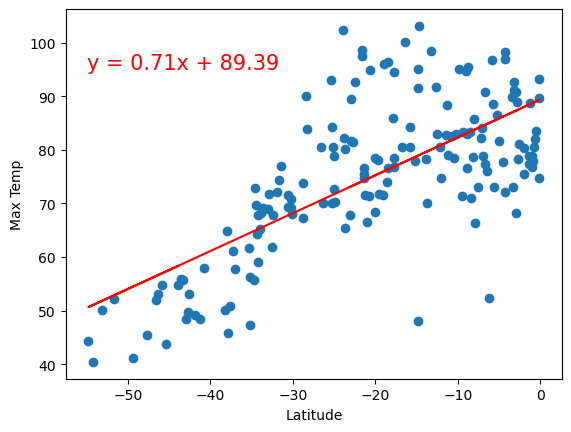

In [66]:
# Linear regression on Southern Hemisphere
max_temp_lin_regress_south = lin_regress_plot(southern_hemi_df, "Lat", "Max Temp", (-55, 95))
max_temp_lin_regress_south

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08622141414919327


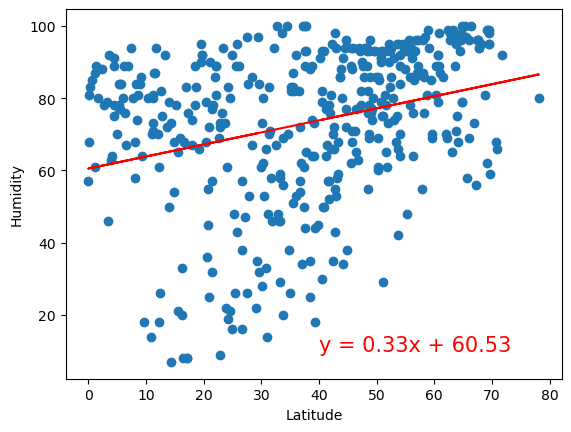

In [69]:
# Northern Hemisphere
humidity_lin_regress_north = lin_regress_plot(northern_hemi_df, "Lat", "Humidity", (40, 10))
humidity_lin_regress_north


The r-value is: 0.006040910673899591


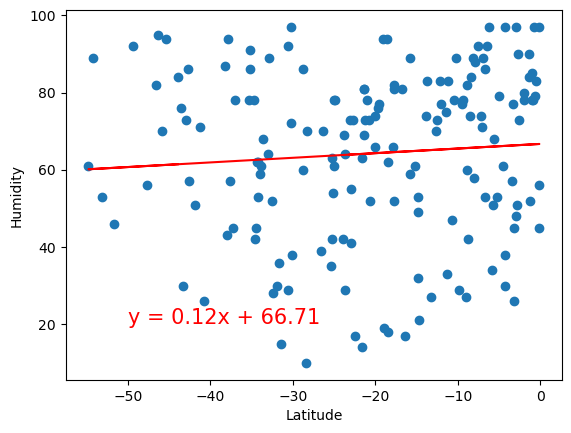

In [70]:
# Southern Hemisphere
humidity_lin_regress_south = lin_regress_plot(southern_hemi_df, "Lat", "Humidity", (-50, 20))
humidity_lin_regress_south

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


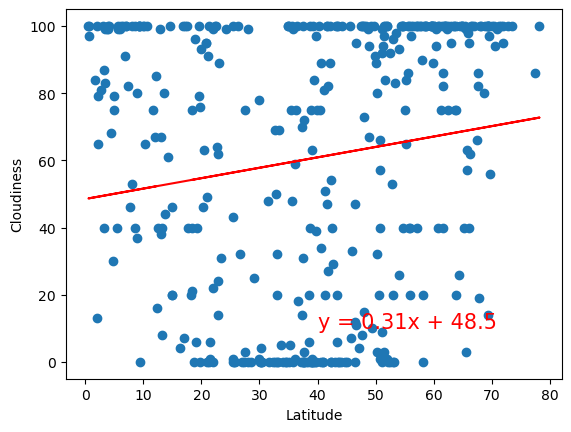

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


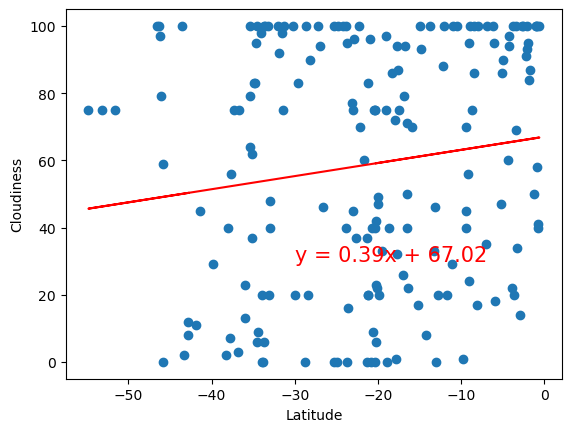

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


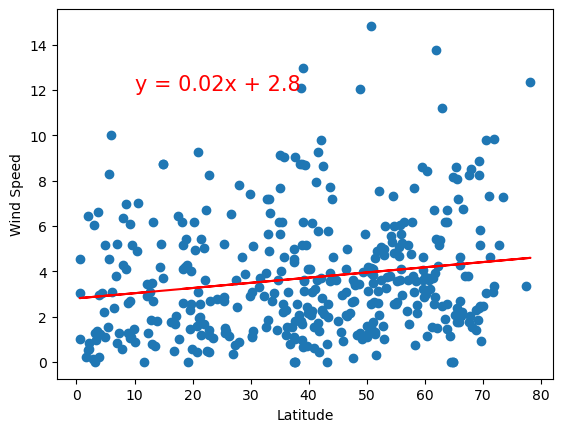

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


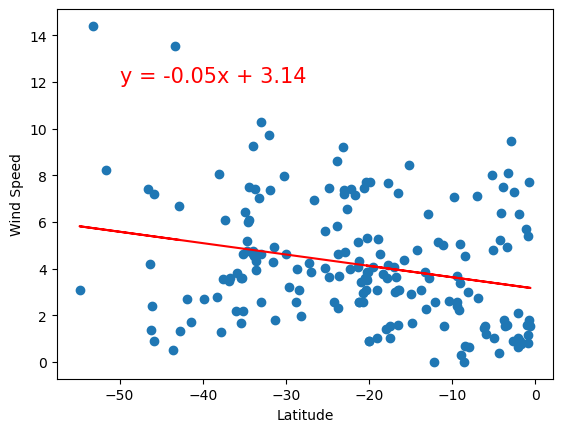

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE